<div align="center"> 
    <h3><font color='blue'>CSE 574 Sections C&D: Introduction to Machine Learning, Spring 2022 </font></h3>
    <h1> Assignment 3 </h1>
    <h2> Part 2 : Optmizing the NN </h2>
    <h4> Submitted By : Akanksha Das & Rahat Bhalla </h4>

<p>"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."</p>
</div>

In [61]:
#Importing Necessary Libraries for Implementing Part 1
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plotter
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score

<b>Importing Income Data CSV using Pandas:<b>

In [2]:
incomeData = pd.read_csv('income_dataset.csv')
incomeDataFrame = pd.DataFrame(incomeData)

samples,attributes = incomeDataFrame.shape
print('\nNo of Samples: {0} and No of Attributes: {1}'.format(samples,attributes))


No of Samples: 32561 and No of Attributes: 15


<b>Analyzing Attributes of Given Data:<b>

In [3]:
attributeList = incomeDataFrame.columns

print('\nColumns in Dataframe and their Imported Data Type:\n')
for i in range(len(attributeList.values)):
    print('Column {0} is \'{1}\' and of data type: {2}'.format(i+1,attributeList.values[i],incomeDataFrame[attributeList.values[i]].dtype))
   


Columns in Dataframe and their Imported Data Type:

Column 1 is 'age' and of data type: int64
Column 2 is 'workclass' and of data type: object
Column 3 is 'fnlwgt' and of data type: int64
Column 4 is 'education' and of data type: object
Column 5 is 'education.num' and of data type: int64
Column 6 is 'marital.status' and of data type: object
Column 7 is 'occupation' and of data type: object
Column 8 is 'relationship' and of data type: object
Column 9 is 'race' and of data type: object
Column 10 is 'sex' and of data type: object
Column 11 is 'capital.gain' and of data type: int64
Column 12 is 'capital.loss' and of data type: int64
Column 13 is 'hours.per.week' and of data type: int64
Column 14 is 'native.country' and of data type: object
Column 15 is 'income' and of data type: object


**Analysis various statistical values of the dataframe**

In [4]:
print(f"\nThe mean of the dataframe is:\n\n {incomeDataFrame.mean()}")
print(f"\nThe median of the dataframe is:\n\n {incomeDataFrame.median()}")
print(f"\nThe mode of the dataframe Attributes \'Age\', \'hours per week \' and \'Number of Education Years\'is:\n\n {incomeDataFrame[['age','hours.per.week','education.num']].mode()}")


The mean of the dataframe is:

 age                   38.581647
fnlwgt            189778.366512
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

The median of the dataframe is:

 age                   37.0
fnlwgt            178356.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
dtype: float64

The mode of the dataframe Attributes 'Age', 'hours per week ' and 'Number of Education Years'is:

    age  hours.per.week  education.num
0   36              40              9


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


<b>Determining number of samples missing attributes and how many:<b>

In [5]:
#Check How many attributes are missing information

print('\n~~Checking for Samples with Missing Data~~\n')
print('Total Number of Samples is:',samples,'\n')
attributesWithMissingValues=0
incomeDataFrame=incomeDataFrame.replace('?',pd.NA)

for i in range(len(attributeList)):
    dataCount = incomeDataFrame[attributeList[i]].count()
    if samples-dataCount>0:
        print("No of Samples in data set with missing attribute '{0}' are: {1}".format(attributeList[i],samples-dataCount))
        attributesWithMissingValues=attributesWithMissingValues+1

print("\nNo of Columns that have missing values:",attributesWithMissingValues)



~~Checking for Samples with Missing Data~~

Total Number of Samples is: 32561 

No of Samples in data set with missing attribute 'workclass' are: 1836
No of Samples in data set with missing attribute 'occupation' are: 1843
No of Samples in data set with missing attribute 'native.country' are: 583

No of Columns that have missing values: 3


<b>Updating Attributes that have type object to Category:<b>

In [6]:
for i in range(len(attributeList)):
    if incomeDataFrame[attributeList[i]].dtype=='object':
        incomeDataFrame[attributeList[i]]=incomeDataFrame[attributeList[i]].astype('category')
        print('Updating type for :',attributeList[i],'to ',incomeDataFrame[attributeList[i]].dtype)



Updating type for : workclass to  category
Updating type for : education to  category
Updating type for : marital.status to  category
Updating type for : occupation to  category
Updating type for : relationship to  category
Updating type for : race to  category
Updating type for : sex to  category
Updating type for : native.country to  category
Updating type for : income to  category


<b>Dropping Samples with N/A Values<b>

In [7]:
incomeDataFrame=incomeDataFrame.dropna()
samples,attributes = incomeDataFrame.shape
print('Total Number of Samples After Dropping is:',samples,'\n')


Total Number of Samples After Dropping is: 30162 



<b>Plot of Education Qualification of Samples<b>

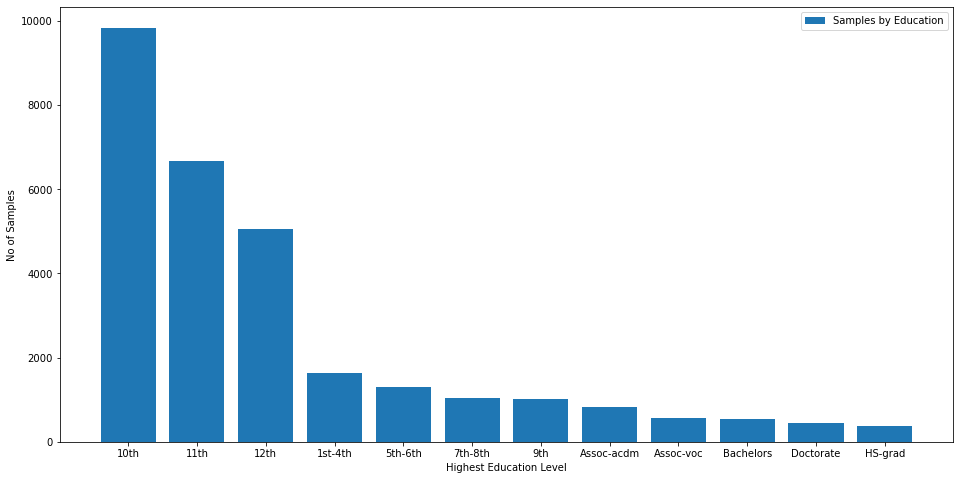

In [8]:
d=incomeDataFrame['education'].value_counts()
y=d.index.categories.values[range(12)]
x=d.values[range(12)]

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Samples by Education')
plotter.xlabel('Highest Education Level')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Plot of Top Employers<b>

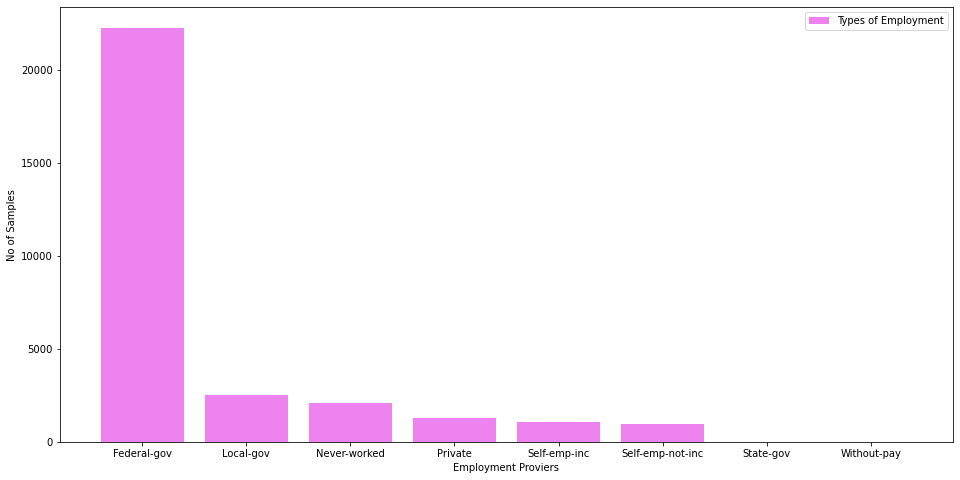

In [9]:
d=incomeDataFrame['workclass'].value_counts()
y=d.index.categories.values
x=d.values

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Types of Employment',color='violet')
plotter.xlabel('Employment Proviers')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Plot of Most Employable Occupations<b>

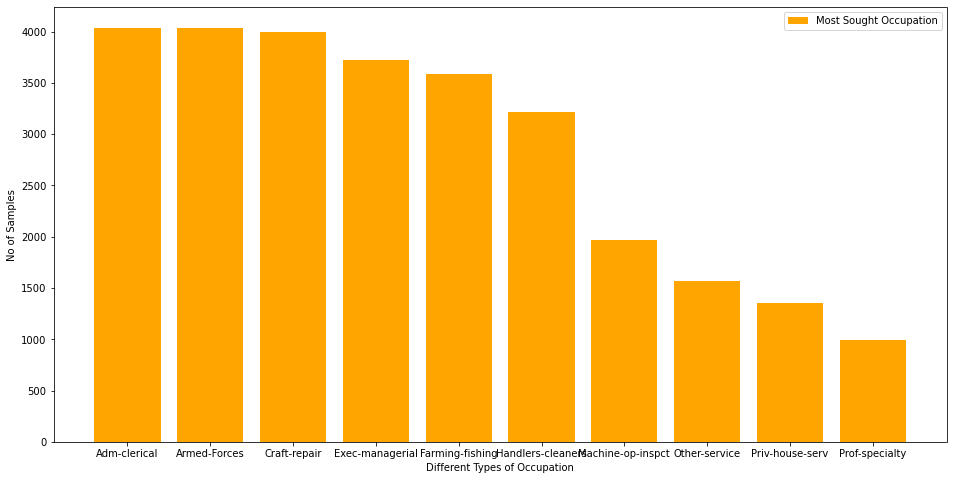

In [10]:
d=incomeDataFrame['occupation'].value_counts()
y=d.index.categories.values[range(10)]
x=d.values[range(10)]

plotter.figure(figsize=(16,8))
plotter.bar(y,x, label='Most Sought Occupation',color='orange')
plotter.xlabel('Different Types of Occupation')
plotter.ylabel('No of Samples')
plotter.legend()
plotter.show()

<b>Renaming the Values of Attribute 'Income' so we may easily classify:<b>

In [11]:
print('No of Categories for attribute, \'Income\':',len(incomeDataFrame.income.cat.categories.array))
print('The Categories are:')
for counter in range(len(incomeDataFrame.income.cat.categories.array)):
    print(incomeDataFrame.income.cat.categories.array[counter])
    
print('Re-naming categories , changing <=50K to 0 and >50K to 1')
incomeDataFrame['income']=incomeDataFrame.income.cat.rename_categories([0,1])


No of Categories for attribute, 'Income': 2
The Categories are:
<=50K
>50K
Re-naming categories , changing <=50K to 0 and >50K to 1


<b>Converting Other Category attributes to Numerical Codes for Computation:<b>

In [12]:

incomeDataFrame['workclass']=incomeDataFrame.workclass.cat.codes
incomeDataFrame['occupation']=incomeDataFrame.occupation.cat.codes
incomeDataFrame['race']=incomeDataFrame.race.cat.codes
incomeDataFrame['sex']=incomeDataFrame.sex.cat.codes
incomeDataFrame['native.country']=incomeDataFrame['native.country'].cat.codes
incomeDataFrame['relationship']=incomeDataFrame['relationship'].cat.codes
incomeDataFrame['marital.status']=incomeDataFrame['marital.status'].cat.codes
incomeDataFrame['education']=incomeDataFrame['education'].cat.codes
#incomeDataFrame['income']=incomeDataFrame['income'].cat.codes



In [13]:
attributes = ['age','workclass','education.num','occupation','race','sex','native.country','capital.loss','hours.per.week','relationship','marital.status','fnlwgt','education','capital.gain']
#attributes = ['age','workclass','education.num','education','occupation','race','income','hours.per.week','native.country']
for attributeCounter in range(len(attributes)):
    maxValue = incomeDataFrame[attributes[attributeCounter]].max()
    minValue = incomeDataFrame[attributes[attributeCounter]].min()
    incomeDataFrame[attributes[attributeCounter]]=(incomeDataFrame[attributes[attributeCounter]]-minValue)/(maxValue-minValue)


<b>Splitting Given Data Set into Training and Testing Set<b>

In [14]:
incomeDataFrame = incomeDataFrame.sample(frac=1).reset_index(drop=True)
featureVector = incomeDataFrame[['age','workclass','education.num','occupation','race','sex','native.country','capital.loss','hours.per.week','relationship','marital.status','fnlwgt','education','capital.gain']]
actualLabelVector = incomeDataFrame['income'].astype('float64')

#featureVector=incomeDataFrame[['age','workclass','education.num','education','occupation','race','income','hours.per.week','native.country']]
#actualLabelVector = incomeDataFrame['sex'].astype('float64')
trainingSetSampleSize = math.floor(0.8*samples)
print('No of Samples in Training Set:',trainingSetSampleSize)

X_Train = featureVector.iloc[:trainingSetSampleSize,:]
Y_Train_Label = actualLabelVector.iloc[:trainingSetSampleSize]

X_Test = featureVector.iloc[trainingSetSampleSize:,:]
Y_Test_Label = actualLabelVector.iloc[trainingSetSampleSize:]

print(X_Train.shape,':',Y_Train_Label.shape)
print(X_Test.shape,':',Y_Test_Label.shape)



No of Samples in Training Set: 24129
(24129, 14) : (24129,)
(6033, 14) : (6033,)


<b>Implementing NN Model<b>

In [87]:
neuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')])

neuralNetworkModel.compile(optimizer='adam',
                           loss='binary_crossentropy',
                          metrics=['accuracy'])
trainingResults = neuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=32,epochs=100)


Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 5s 188us/sample - loss: 0.4667 - accuracy: 0.7825 - val_loss: 0.3825 - val_accuracy: 0.8213
Epoch 2/100
24129/24129 [==============================] - 3s 113us/sample - loss: 0.3782 - accuracy: 0.8252 - val_loss: 0.3577 - val_accuracy: 0.8349
Epoch 3/100
24129/24129 [==============================] - 3s 113us/sample - loss: 0.3616 - accuracy: 0.8334 - val_loss: 0.3447 - val_accuracy: 0.8409
Epoch 4/100
24129/24129 [==============================] - 3s 123us/sample - loss: 0.3524 - accuracy: 0.8383 - val_loss: 0.3406 - val_accuracy: 0.8407
Epoch 5/100
24129/24129 [==============================] - 3s 126us/sample - loss: 0.3502 - accuracy: 0.8364 - val_loss: 0.3401 - val_accuracy: 0.8389
Epoch 6/100
24129/24129 [==============================] - 4s 145us/sample - loss: 0.3487 - accuracy: 0.8381 - val_loss: 0.3418 - val_accuracy: 0.8381
Epoch 7/100
24129/24129 [====================

24129/24129 [==============================] - 3s 104us/sample - loss: 0.3245 - accuracy: 0.8478 - val_loss: 0.3273 - val_accuracy: 0.8420
Epoch 54/100
24129/24129 [==============================] - 3s 144us/sample - loss: 0.3244 - accuracy: 0.8452 - val_loss: 0.3272 - val_accuracy: 0.8432
Epoch 55/100
24129/24129 [==============================] - 3s 114us/sample - loss: 0.3236 - accuracy: 0.8467 - val_loss: 0.3346 - val_accuracy: 0.8409
Epoch 56/100
24129/24129 [==============================] - 3s 107us/sample - loss: 0.3226 - accuracy: 0.8481 - val_loss: 0.3289 - val_accuracy: 0.8449
Epoch 57/100
24129/24129 [==============================] - 3s 133us/sample - loss: 0.3229 - accuracy: 0.8487 - val_loss: 0.3323 - val_accuracy: 0.8430
Epoch 58/100
24129/24129 [==============================] - 3s 108us/sample - loss: 0.3240 - accuracy: 0.8477 - val_loss: 0.3283 - val_accuracy: 0.8415
Epoch 59/100
24129/24129 [==============================] - 4s 159us/sample - loss: 0.3221 - accuracy

In [86]:
trainingAccuracy = neuralNetworkModel.evaluate(X_Train,Y_Train_Label,verbose=0)
testingAccuracy = neuralNetworkModel.evaluate(X_Test,Y_Test_Label,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.85353726

Test Accuracy:  0.83988065


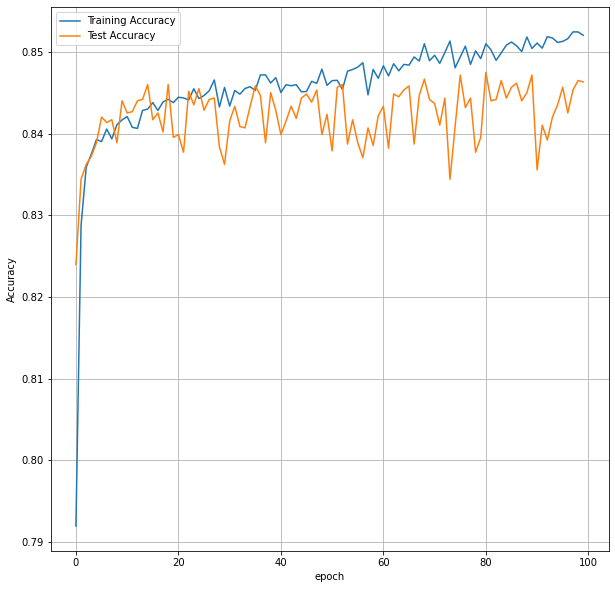

In [51]:
plotter.figure(figsize=(10,10))
plotter.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

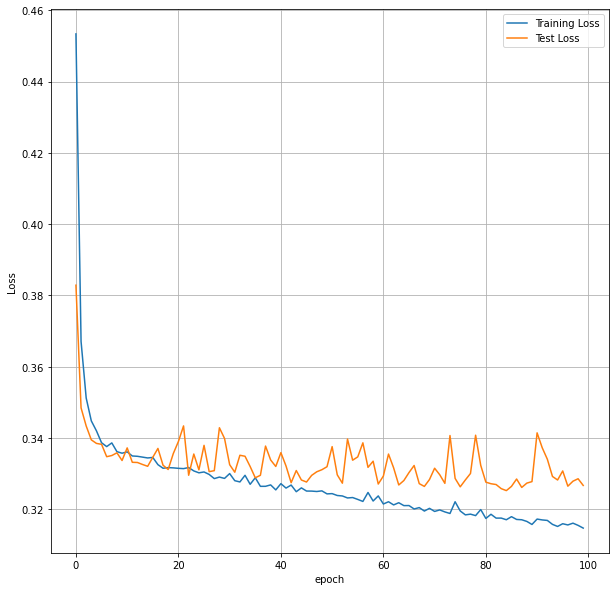

In [52]:
plotter.figure(figsize=(10,10))
plotter.plot(trainingResults.history['loss'], label='Training Loss')
plotter.plot(trainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<div>
    <h3 align="center"> Chosen Base Model Description</h3>
<p>The Base Model that has been finalized has 1 Input Layer with 14 Units, 3 Hidden Layers: the first with 30 units ,  the second with 15 units and the third with 7 Units, and one output layer with 1 unit. </p>
</div>

<b>Implementing Early stopping<b>

In [88]:
baseNeuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')])

#EarlyStopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
early_stopping = EarlyStopping()
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.001, 
    mode='max'
)

baseNeuralNetworkModel.compile(optimizer='adam',
                           loss='binary_crossentropy',
                          metrics=['accuracy'])
earlyStoppingTrainingResults = baseNeuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=32,epochs=100,callbacks=[custom_early_stopping])



Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 4s 159us/sample - loss: 0.4816 - accuracy: 0.7549 - val_loss: 0.4012 - val_accuracy: 0.8183
Epoch 2/100
24129/24129 [==============================] - 3s 107us/sample - loss: 0.3706 - accuracy: 0.8295 - val_loss: 0.3518 - val_accuracy: 0.8354
Epoch 3/100
24129/24129 [==============================] - 3s 107us/sample - loss: 0.3492 - accuracy: 0.8359 - val_loss: 0.3566 - val_accuracy: 0.8314
Epoch 4/100
24129/24129 [==============================] - 3s 113us/sample - loss: 0.3434 - accuracy: 0.8400 - val_loss: 0.3403 - val_accuracy: 0.8397
Epoch 5/100
24129/24129 [==============================] - 3s 106us/sample - loss: 0.3400 - accuracy: 0.8423 - val_loss: 0.3399 - val_accuracy: 0.8395
Epoch 6/100
24129/24129 [==============================] - 3s 115us/sample - loss: 0.3380 - accuracy: 0.8419 - val_loss: 0.3382 - val_accuracy: 0.8435
Epoch 7/100
24129/24129 [====================

In [89]:
earlyStoppingTrainingAccuracy = baseNeuralNetworkModel.evaluate(X_Train,Y_Train_Label,verbose=0)
earlyStoppingTestingAccuracy = baseNeuralNetworkModel.evaluate(X_Test,Y_Test_Label,verbose=0)
print('\n\n')
print('\nTraining Accuracy Early Stopping: ',earlyStoppingTrainingAccuracy[1])
print('\nTest Accuracy Early Stopping: ',earlyStoppingTestingAccuracy[1])





Training Accuracy Early Stopping:  0.8472792

Test Accuracy Early Stopping:  0.84319574


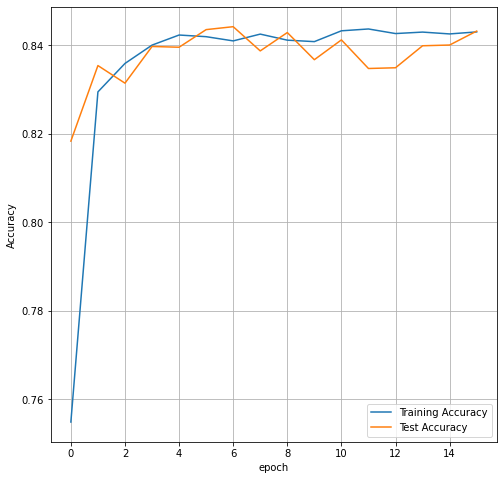

In [90]:
plotter.figure(figsize=(8,8))
plotter.plot(earlyStoppingTrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(earlyStoppingTrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

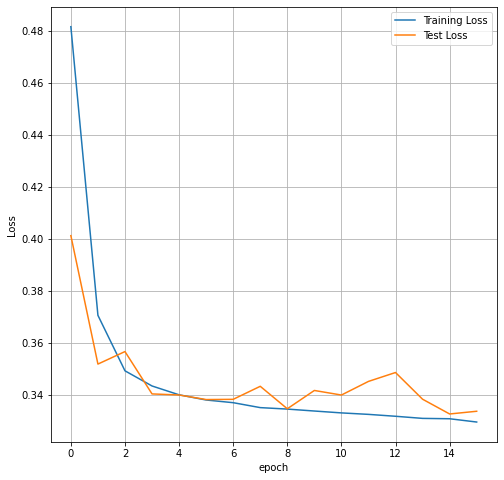

In [91]:
plotter.figure(figsize=(8,8))
plotter.plot(earlyStoppingTrainingResults.history['loss'], label='Training Loss')
plotter.plot(earlyStoppingTrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<b>Using SGD with the momentum variable<b>

In [53]:
baseNeuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')])
learning_rate = 0.01
epochs = 100
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

baseNeuralNetworkModel.compile(optimizer=sgd,
                           loss='binary_crossentropy',
                          metrics=['accuracy'])
sgdMomentumTrainingResults = baseNeuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=32,epochs=epochs)



Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 4s 147us/sample - loss: 0.4801 - accuracy: 0.7697 - val_loss: 0.4215 - val_accuracy: 0.8031
Epoch 2/100
24129/24129 [==============================] - 2s 101us/sample - loss: 0.4084 - accuracy: 0.8072 - val_loss: 0.4154 - val_accuracy: 0.8074
Epoch 3/100
24129/24129 [==============================] - 3s 105us/sample - loss: 0.3866 - accuracy: 0.8159 - val_loss: 0.3775 - val_accuracy: 0.8241
Epoch 4/100
24129/24129 [==============================] - 2s 101us/sample - loss: 0.3715 - accuracy: 0.8234 - val_loss: 0.3627 - val_accuracy: 0.8216
Epoch 5/100
24129/24129 [==============================] - 3s 114us/sample - loss: 0.3646 - accuracy: 0.8274 - val_loss: 0.3542 - val_accuracy: 0.8352
Epoch 6/100
24129/24129 [==============================] - 2s 103us/sample - loss: 0.3590 - accuracy: 0.8300 - val_loss: 0.4047 - val_accuracy: 0.7979
Epoch 7/100
24129/24129 [====================

24129/24129 [==============================] - 2s 102us/sample - loss: 0.3266 - accuracy: 0.8457 - val_loss: 0.3309 - val_accuracy: 0.8430
Epoch 54/100
24129/24129 [==============================] - 2s 97us/sample - loss: 0.3270 - accuracy: 0.8450 - val_loss: 0.3371 - val_accuracy: 0.8391
Epoch 55/100
24129/24129 [==============================] - 2s 96us/sample - loss: 0.3273 - accuracy: 0.8463 - val_loss: 0.3479 - val_accuracy: 0.8357
Epoch 56/100
24129/24129 [==============================] - 3s 108us/sample - loss: 0.3273 - accuracy: 0.8460 - val_loss: 0.3813 - val_accuracy: 0.8094
Epoch 57/100
24129/24129 [==============================] - 3s 105us/sample - loss: 0.3286 - accuracy: 0.8459 - val_loss: 0.3336 - val_accuracy: 0.8415
Epoch 58/100
24129/24129 [==============================] - 3s 104us/sample - loss: 0.3266 - accuracy: 0.8469 - val_loss: 0.3308 - val_accuracy: 0.8429
Epoch 59/100
24129/24129 [==============================] - 3s 107us/sample - loss: 0.3265 - accuracy: 

In [54]:
sgdMomentumTrainingAccuracy = baseNeuralNetworkModel.evaluate(X_Train,Y_Train_Label,verbose=0)
sgdMomentumTestingAccuracy = baseNeuralNetworkModel.evaluate(X_Test,Y_Test_Label,verbose=0)
print('\n\n')
print('\nTraining Accuracy Early Stopping: ',sgdMomentumTrainingAccuracy[1])
print('\nTest Accuracy Early Stopping: ',sgdMomentumTestingAccuracy[1])





Training Accuracy Early Stopping:  0.8498902

Test Accuracy Early Stopping:  0.8445218


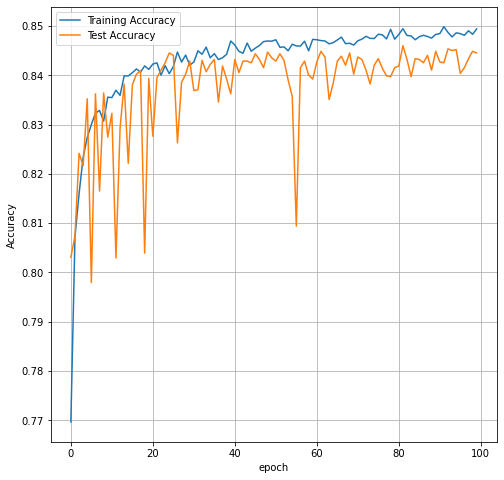

In [56]:
plotter.figure(figsize=(8,8))
plotter.plot(sgdMomentumTrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(sgdMomentumTrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

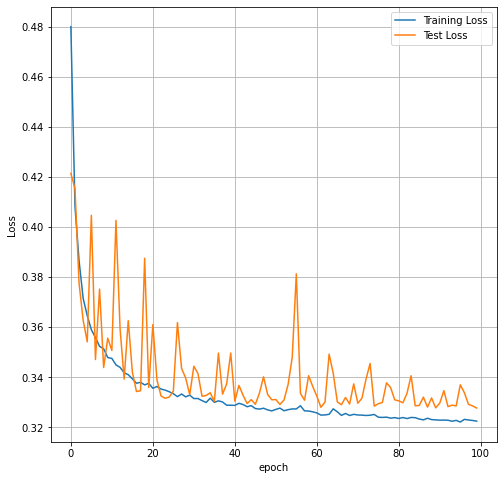

In [57]:
plotter.figure(figsize=(8,8))
plotter.plot(sgdMomentumTrainingResults.history['loss'], label='Training Loss')
plotter.plot(sgdMomentumTrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<b>Implementing K FOLD to Verify Accuracy Scores on Training Data Set<b>

In [75]:
def create_network():
    neuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])
    neuralNetworkModel.compile(optimizer='adam',
                               loss='binary_crossentropy',
                              metrics=['accuracy'])
    return neuralNetworkModel

print('Running K-Fold Neural Network')
# Wrap Keras model so it can be used by scikit-learn
neural_network =  keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_network, 
                                 epochs=32, 
                                 batch_size=100, 
                                 verbose=0)
# Evaluate neural network using three-fold cross-validation
crossValidationScores= cross_val_score(neural_network, X_Train.to_numpy(),Y_Train_Label.to_numpy(), cv=7)

print('\n\nCross Validation Scores obtained via K FOLD:',crossValidationScores)
    
# trainingResults = neuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=10,epochs=100)


Running K-Fold Neural Network


Cross Validation Scores obtained via K FOLD: [0.83899045 0.83347839 0.84218162 0.85842764 0.84363216 0.83637947
 0.8381201 ]


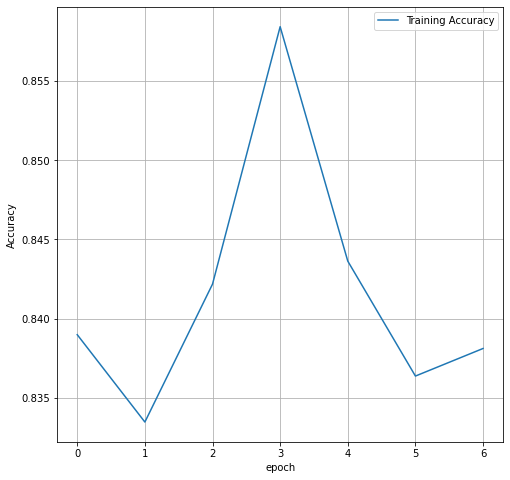

In [76]:
plotter.figure(figsize=(8,8))
plotter.plot(crossValidationScores, label='Training Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

<b>Implementing L2 Regularization on Training Data Set<b>

In [70]:
l2RegualizerNeuralNetworkModel = keras.Sequential([
    keras.layers.Dense(30, input_shape=(14,),activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    keras.layers.Dense(14, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    keras.layers.Dense(6, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')])

l2RegualizerNeuralNetworkModel.compile(optimizer='adam',
                           loss='binary_crossentropy',
                          metrics=['accuracy'])

    
l2RegularizertrainingResults = l2RegualizerNeuralNetworkModel.fit(X_Train,Y_Train_Label,validation_data=(X_Test,Y_Test_Label),batch_size=10,epochs=100)


Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 10s 431us/sample - loss: 0.4571 - accuracy: 0.7871 - val_loss: 0.3718 - val_accuracy: 0.8334
Epoch 2/100
24129/24129 [==============================] - 9s 373us/sample - loss: 0.3797 - accuracy: 0.8221 - val_loss: 0.3587 - val_accuracy: 0.8344
Epoch 3/100
24129/24129 [==============================] - 9s 379us/sample - loss: 0.3692 - accuracy: 0.8268 - val_loss: 0.3646 - val_accuracy: 0.8223
Epoch 4/100
24129/24129 [==============================] - 9s 372us/sample - loss: 0.3635 - accuracy: 0.8304 - val_loss: 0.3447 - val_accuracy: 0.8402
Epoch 5/100
24129/24129 [==============================] - 9s 384us/sample - loss: 0.3599 - accuracy: 0.8319 - val_loss: 0.3522 - val_accuracy: 0.8374
Epoch 6/100
24129/24129 [==============================] - 11s 449us/sample - loss: 0.3607 - accuracy: 0.8325 - val_loss: 0.3423 - val_accuracy: 0.8419
Epoch 7/100
24129/24129 [==================

24129/24129 [==============================] - 10s 410us/sample - loss: 0.3469 - accuracy: 0.8358 - val_loss: 0.3388 - val_accuracy: 0.8434
Epoch 54/100
24129/24129 [==============================] - 9s 392us/sample - loss: 0.3464 - accuracy: 0.8360 - val_loss: 0.3339 - val_accuracy: 0.8455
Epoch 55/100
24129/24129 [==============================] - 11s 452us/sample - loss: 0.3456 - accuracy: 0.8371 - val_loss: 0.3396 - val_accuracy: 0.8407
Epoch 56/100
24129/24129 [==============================] - 10s 396us/sample - loss: 0.3448 - accuracy: 0.8358 - val_loss: 0.3393 - val_accuracy: 0.8429
Epoch 57/100
24129/24129 [==============================] - 9s 378us/sample - loss: 0.3458 - accuracy: 0.8360 - val_loss: 0.3383 - val_accuracy: 0.8420
Epoch 58/100
24129/24129 [==============================] - 9s 367us/sample - loss: 0.3463 - accuracy: 0.8349 - val_loss: 0.3350 - val_accuracy: 0.8449
Epoch 59/100
24129/24129 [==============================] - 9s 382us/sample - loss: 0.3453 - accur

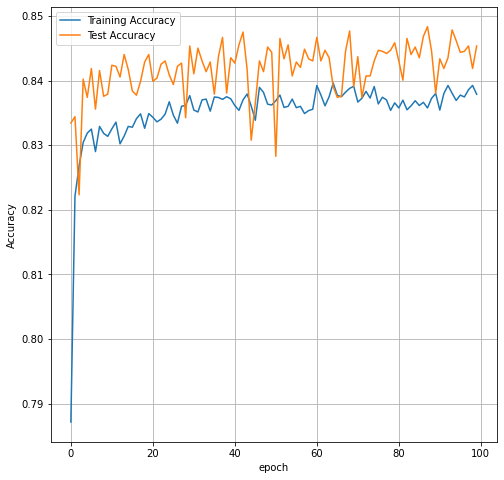

In [71]:
plotter.figure(figsize=(8,8))
plotter.plot(l2RegularizertrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(l2RegularizertrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

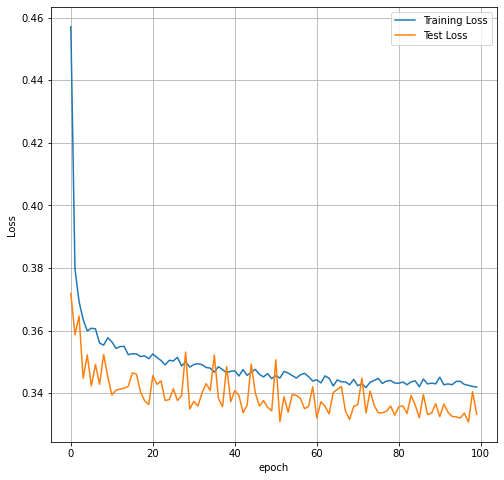

In [72]:
plotter.figure(figsize=(8,8))
plotter.plot(l2RegularizertrainingResults.history['loss'], label='Training Loss')
plotter.plot(l2RegularizertrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()